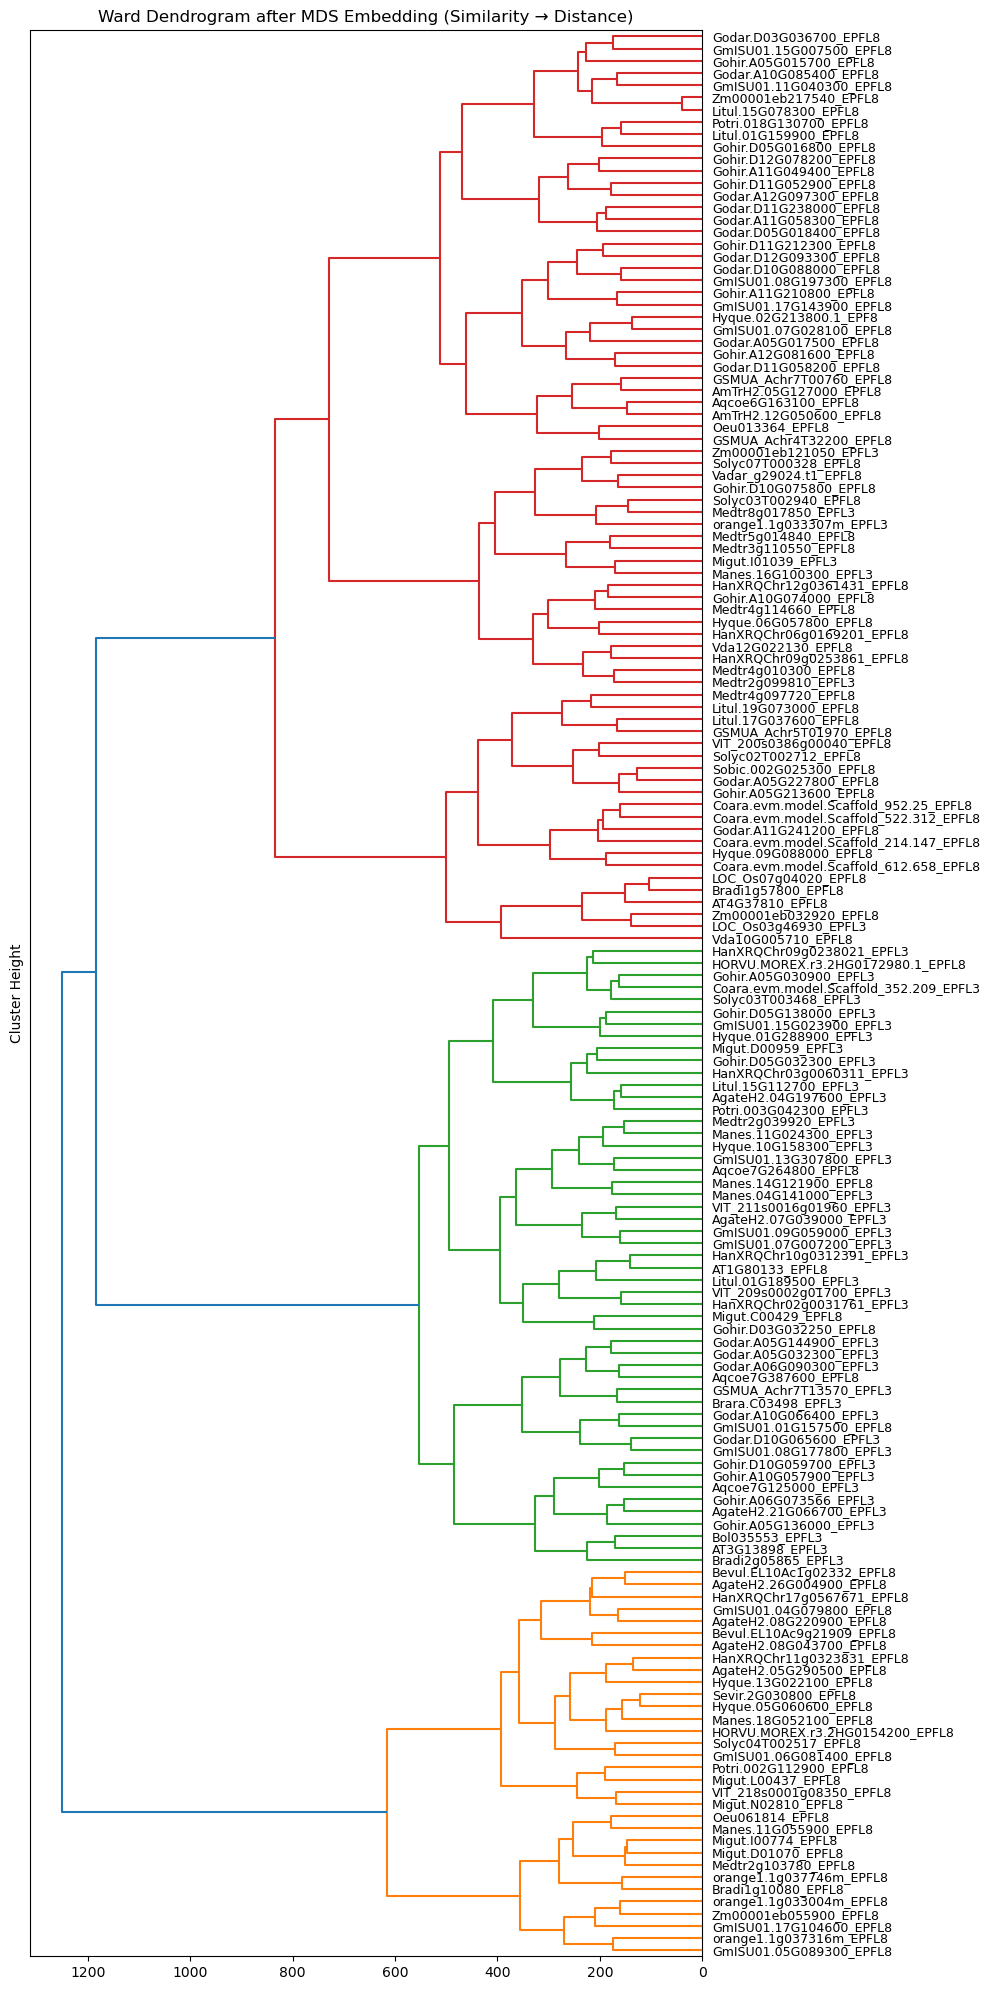

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# 1. Load similarity matrix
df = pd.read_csv(r"[file ]",
                 index_col=0)

# 2. Convert similarity → distance
max_val = df.values.max()
dist_df = max_val - df
dist_df = (dist_df + dist_df.T) / 2  # symmetrize

# 3. Condensed form
condensed = squareform(dist_df.values, checks=False)

# 4. Hierarchical clustering with Ward’s method
Z = linkage(condensed, method='ward')

# 5. Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=dist_df.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage, Similarity → Distance)")
plt.ylabel("Distance")

plt.tight_layout()
plt.savefig(r"[file path here]",
            dpi=300, bbox_inches="tight")
plt.show()